In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [61]:
df_temp=pd.read_csv("MaunaLoaDailyTemps.csv")
df_temp


,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758
...,...,...,...,...,...,...
1820,12/26/2018,35.0,45.0,40.0,654,1752
1821,12/27/2018,33.0,44.0,39.0,655,1752
1822,12/28/2018,33.0,47.0,40.0,655,1753
1823,12/29/2018,36.0,47.0,42.0,655,1753


In [63]:
df_temp[df_temp["AvgTemp"]>50]

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
24,1/25/2014,41.0,62.0,52.0,659,1811
107,4/18/2014,43.0,60.0,52.0,602,1841
108,4/19/2014,43.0,60.0,52.0,602,1841
114,4/25/2014,43.0,59.0,51.0,558,1843
115,4/26/2014,45.0,62.0,54.0,557,1844
...,...,...,...,...,...,...
1732,9/29/2018,43.0,61.0,52.0,613,1812
1733,9/30/2018,43.0,62.0,53.0,613,1811
1734,10/1/2018,40.0,63.0,52.0,613,1811
1737,10/4/2018,43.0,58.0,51.0,614,1808


In [72]:
max_temp1_data=df_temp[["DATE","AvgTemp"]]

In [64]:
df_temp["MaxTemp"].max()

67.0

In [69]:
df_temp.sort_values(by="MaxTemp", ascending=False)

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
914,7/3/2016,45.0,67.0,56.0,548,1905
533,6/18/2015,45.0,67.0,56.0,544,1903
1255,6/9/2017,46.0,66.0,56.0,543,1900
577,8/1/2015,46.0,66.0,56.0,558,1859
560,7/15/2015,44.0,66.0,55.0,552,1904
...,...,...,...,...,...,...
367,1/3/2015,29.0,36.0,33.0,657,1757
136,5/17/2014,NaN,NaN,NaN,546,1851
840,4/20/2016,NaN,NaN,NaN,600,1842
1204,4/19/2017,NaN,NaN,NaN,602,1841


In [71]:
df_temp.info

<bound method DataFrame.info of             DATE  MinTemp  MaxTemp  AvgTemp  Sunrise  Sunset
0       1/1/2014     33.0     46.0     40.0      657    1756
1       1/2/2014     35.0     50.0     43.0      657    1756
2       1/3/2014     36.0     45.0     41.0      657    1757
3       1/4/2014     32.0     41.0     37.0      658    1757
4       1/5/2014     24.0     38.0     31.0      658    1758
...          ...      ...      ...      ...      ...     ...
1820  12/26/2018     35.0     45.0     40.0      654    1752
1821  12/27/2018     33.0     44.0     39.0      655    1752
1822  12/28/2018     33.0     47.0     40.0      655    1753
1823  12/29/2018     36.0     47.0     42.0      655    1753
1824  12/30/2018     39.0     52.0     46.0      656    1754

[1825 rows x 6 columns]>

In [73]:
max_temp1_data["DATE"]=pd.to_datetime(max_temp1_data["DATE"])

C:\Users\HI\AppData\Local\Temp\ipykernel_16020\618069056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_temp1_data["DATE"]=pd.to_datetime(max_temp1_data["DATE"])


In [74]:
max_temp1_data.index=max_temp1_data["DATE"]

In [29]:
max_temp1_data

,DATE,MaxTemp
DATE,,
2014-01-01,2014-01-01,46.0
2014-01-02,2014-01-02,50.0
2014-01-03,2014-01-03,45.0
2014-01-04,2014-01-04,41.0
2014-01-05,2014-01-05,38.0
...,...,...
2018-12-26,2018-12-26,45.0
2018-12-27,2018-12-27,44.0
2018-12-28,2018-12-28,47.0


In [75]:
del max_temp1_data["DATE"]

In [76]:
max_temp1_data

,AvgTemp
DATE,
2014-01-01,40.0
2014-01-02,43.0
2014-01-03,41.0
2014-01-04,37.0
2014-01-05,31.0
...,...
2018-12-26,40.0
2018-12-27,39.0
2018-12-28,40.0


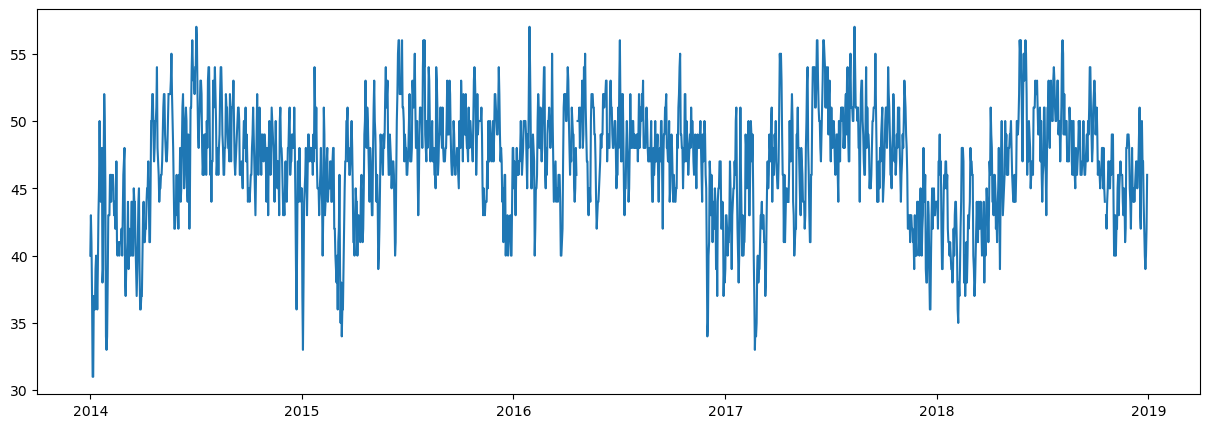

In [77]:
plt.figure(figsize=(15,5))
plt.plot(max_temp1_data)


In [78]:
from statsmodels.tsa.stattools import adfuller

In [79]:
def check_stationary(series):
    result=adfuller(series)
    p_value=result[1]
    if p_value>0.05:
        print("data is not staionary")
    else:
        print("data is stationary")

In [80]:
check_stationary(max_temp1_data.dropna())

data is stationary


In [81]:
from pmdarima import auto_arima

In [82]:
model= auto_arima(max_temp1_data.dropna())

In [83]:
model

ARIMA(order=(1, 0, 5), scoring_args={}, suppress_warnings=True)

In [84]:
from statsmodels.tsa.stattools import pacf,acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

In [53]:
max_temp1_data

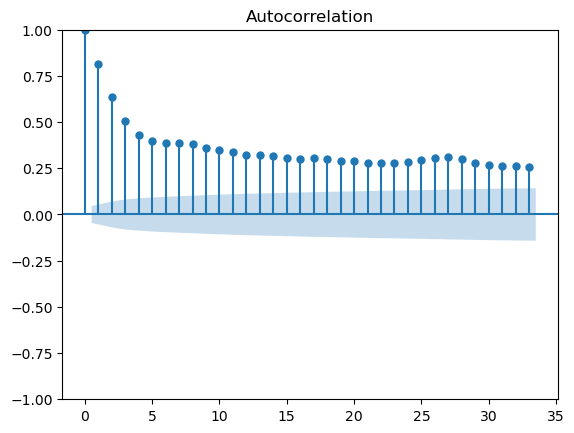

In [85]:
acf_model=plot_acf(max_temp1_data["AvgTemp"].dropna())

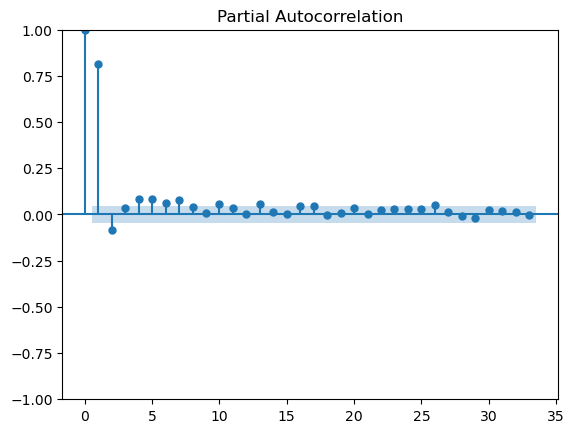

In [86]:
pacf_model=plot_pacf(max_temp1_data["AvgTemp"].dropna())

In [88]:
from statsmodels.tsa.arima.model import ARIMA
train = max_temp1_data.iloc[:1000]['AvgTemp']
test = max_temp1_data.iloc[1001:]['AvgTemp']
model = ARIMA(train, order=(1,0,5))
model_fit = model.fit()
model_fit.summary()

C:\Users\HI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1000
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -2272.079
Date:                Tue, 30 Apr 2024   AIC                           4560.159
Time:                        17:25:37   BIC                           4599.421
Sample:                    01-01-2014   HQIC                          4575.081
                         - 09-26-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.7521      1.033     45.278      0.000      44.728      48.776
ar.L1          0.9888      0.006    173.457      0.000       0.978       1.000
ma.L1         -0.1225      0.030     -4.022      0.000      -0.182      -0.063
ma.L2         -0.2720      0.032     -8.632      0.000      -0.334      -0.210
ma.L3         -0.2335      0.031     -7.613      0.000      -0.294      -0.173
ma.L4         -0.1374      0.030     -4.557      0.000      -0.196      -0.078
ma.L5         -0.0613      0.032     -1.893      0.058      -0.125       0.002
sigma2         5.5437      0.225     24.680      0.000       5.103       5.984
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                19.98
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.15
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""